In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import os
import re
from matplotlib import colors

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True) #add flag force_remount = True if needed

Mounted at /content/drive


In [ ]:
!cp -rf "/content/drive/MyDrive/LDA/News.zip" .
!cp -rf "/content/drive/MyDrive/LDA/Headline.zip" .
!unzip -q News.zip
!unzip -q Headline.zip

In [ ]:
#df = pd.read_json('News_Category_Dataset_v3.json', orient = 'records', lines = True)
#df[['headline', 'category', 'short_description']].head()
df = pd.read_csv('abcnews-date-text.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopwordset = set(stopwords.words())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess(text):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(text)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stopwordset]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [ ]:
df['head_clean']=df['headline_text'].apply(preprocess)

In [ ]:
df.sample(10)

,publish_date,headline_text,head_clean
822794,20130930,push to boost bankstown sporting exchange numbers,push boost bankstown sporting exchange number
862325,20140324,henbury pastoral lease,henbury pastoral lease
687752,20120416,police taser victim buried in brazil,police taser victim buried brazil
808840,20130807,cisco report shows everyday human tasks will s...,cisco report show everyday human task automated
653151,20111116,spike in illegal dumping at wolumla,spike illegal dumping wolumla
508457,20091221,watson revealed as bombers captain,watson revealed bomber captain
576144,20101116,lockup only for the bravehearted,lockup bravehearted
309952,20070610,nsw storms claim 7 lives,nsw storm claim 7 life
775633,20130403,tomotu province premier on post tsunami challe...,tomotu province premier post tsunami challenge
974329,20150825,questions over the national disability insuran...,question national disability insurance scheme ...


In [ ]:
df.shape


(1244184, 3)

In [ ]:
orig_df = df
df.drop(['headline_text'], axis=1, inplace=True)
df.head()

,publish_date,head_clean
0,20030219,aba decides community broadcasting licence
1,20030219,act fire witness aware defamation
2,20030219,g call infrastructure protection summit
3,20030219,air nz staff aust strike pay rise
4,20030219,air nz strike affect australian traveller


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf = TfidfVectorizer(stop_words=list(stopwordset), max_features=5000)

#vect_text=vect.fit_transform(df['clean_combined'])
doctermmat=tfidf.fit_transform(df['head_clean'])
idf = tfidf.idf_
doctermmat

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aldiz', 'baiknya', 'baizik', 'berkali', 'bukatzeko', 'edota', 'eze', 'ezpabere', 'ezpada', 'ezperen', 'gainera', 'gainerontzean', 'guztiz', 'hainbestez', 'horra', 'kali', 'kurangnya', 'mata', 'olah', 'onların', 'ordea', 'osterantzean', 'printr', 'sekurang', 'setidak', 'tama', 'tidaknya', 'δι', 'арбаң', 'арсалаң', 'афташ', 'бай', 'бале', 'баски', 'батыр', 'баҳри', 'болои', 'бүгжең', 'бұтыр', 'валекин', 'вақте', 'вой', 'вуҷуди', 'гар', 'гарчанде', 'далаң', 'даме', 'ербелең', 'жалт', 'жұлт', 'карда', 'кошки', 'куя', 'күңгір', 'кӣ', 'магар', 'майлаш', 'митың', 'модоме', 'нияти', 'онан', 'оре', 'паһ', 'рӯи', 'салаң', 'сар', 'сұлаң', 'сұрт', 'тарбаң', 'тразе', 'ту', 'тыржың', 'тұрс', 'хом', 'хуб', 'чаро', 'чи', 'чун', 'чунон', 'шарте', 'шұңқ', 'ыржың', 'қадар', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ',

<1244184x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 5218095 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model=LatentDirichletAllocation(n_components=6,learning_method='online',max_iter=10) 
lda_top=lda_model.fit_transform(doctermmat)
print(lda_top.shape) 
lda_top

(1244184, 6)


array([[0.65330963, 0.06930384, 0.06930384, 0.06930384, 0.06930384,
        0.069475  ],
       [0.05234014, 0.05234014, 0.05242222, 0.73792033, 0.05240889,
        0.05256829],
       [0.05618748, 0.05632808, 0.05604124, 0.0561927 , 0.05613222,
        0.71911828],
       ...,
       [0.37612094, 0.18962439, 0.05606623, 0.05606623, 0.26605599,
        0.05606623],
       [0.20512854, 0.05621845, 0.18064539, 0.44557072, 0.05621845,
        0.05621845],
       [0.18147525, 0.31623336, 0.05179969, 0.17409293, 0.22459908,
        0.05179969]])

In [ ]:
print("Document 2: ")
for i, prob in enumerate(lda_top[2]):
  print("Topic ", i, ": ", prob)

Document 2: 
Topic  0 :  0.05618748059754347
Topic  1 :  0.05632807623224405
Topic  2 :  0.05604124233146647
Topic  3 :  0.05619270347883349
Topic  4 :  0.05613222043560125
Topic  5 :  0.7191182769243113


In [ ]:
vocabulary = tfidf.get_feature_names_out()

for i, j in enumerate(lda_model.components_):
    zipped = zip(vocabulary, j)
    sorted_words = sorted(zipped, key = lambda x:x[1], reverse=True)[:10]
    print("Topic "+ str(i) + ": ")
    for word in sorted_words:
        print(word[0], end = " ")
    print()

Topic 0: 
crash school attack qld coast business melbourne victoria gold road 
Topic 1: 
wa covid case home south news charged report 19 minister 
Topic 2: 
australian sydney court market national open found north record tasmania 
Topic 3: 
government queensland year win car farmer adelaide abc state day 
Topic 4: 
coronavirus australia election world china child hit canberra country final 
Topic 5: 
police interview woman trump plan rural hospital house donald fire 


In [ ]:
results_sample = orig_df.sample(20)
topics = []

for idx in results_sample.index:
  topicstr = ''
  for i, prob in enumerate(lda_top[idx]):
    if prob >= 0.2:
      topicstr += ('Topic ' + str(i) + ": " + str(prob)[:5] + " ")
  
  topics.append(topicstr)

results_sample['topics'] = topics
results_sample

,publish_date,head_clean,topics
459951,20090503,raid law dangerous move,Topic 0: 0.227 Topic 1: 0.354 Topic 2: 0.250
536246,20100507,bligh change proposed federal resource,Topic 0: 0.358 Topic 1: 0.309
561319,20100905,interview ryan hoffman,Topic 4: 0.425 Topic 5: 0.294
394473,20080703,accused rapist refused bail,Topic 0: 0.249 Topic 2: 0.394
93862,20040531,report recommends stronger tie indonesia,Topic 1: 0.305 Topic 2: 0.361
396011,20080710,council sacking spark call royal commission,Topic 1: 0.554 Topic 3: 0.249
1057386,20161112,australia south africa test day live blog hobart,Topic 1: 0.319 Topic 5: 0.270
316266,20070710,number reported nt sex assault drop,Topic 0: 0.243 Topic 2: 0.221 Topic 5: 0.238
263073,20061011,nash back medium law compromise,Topic 1: 0.434 Topic 2: 0.338
220155,20060222,sign chopper crash survivor police,Topic 1: 0.222 Topic 5: 0.309


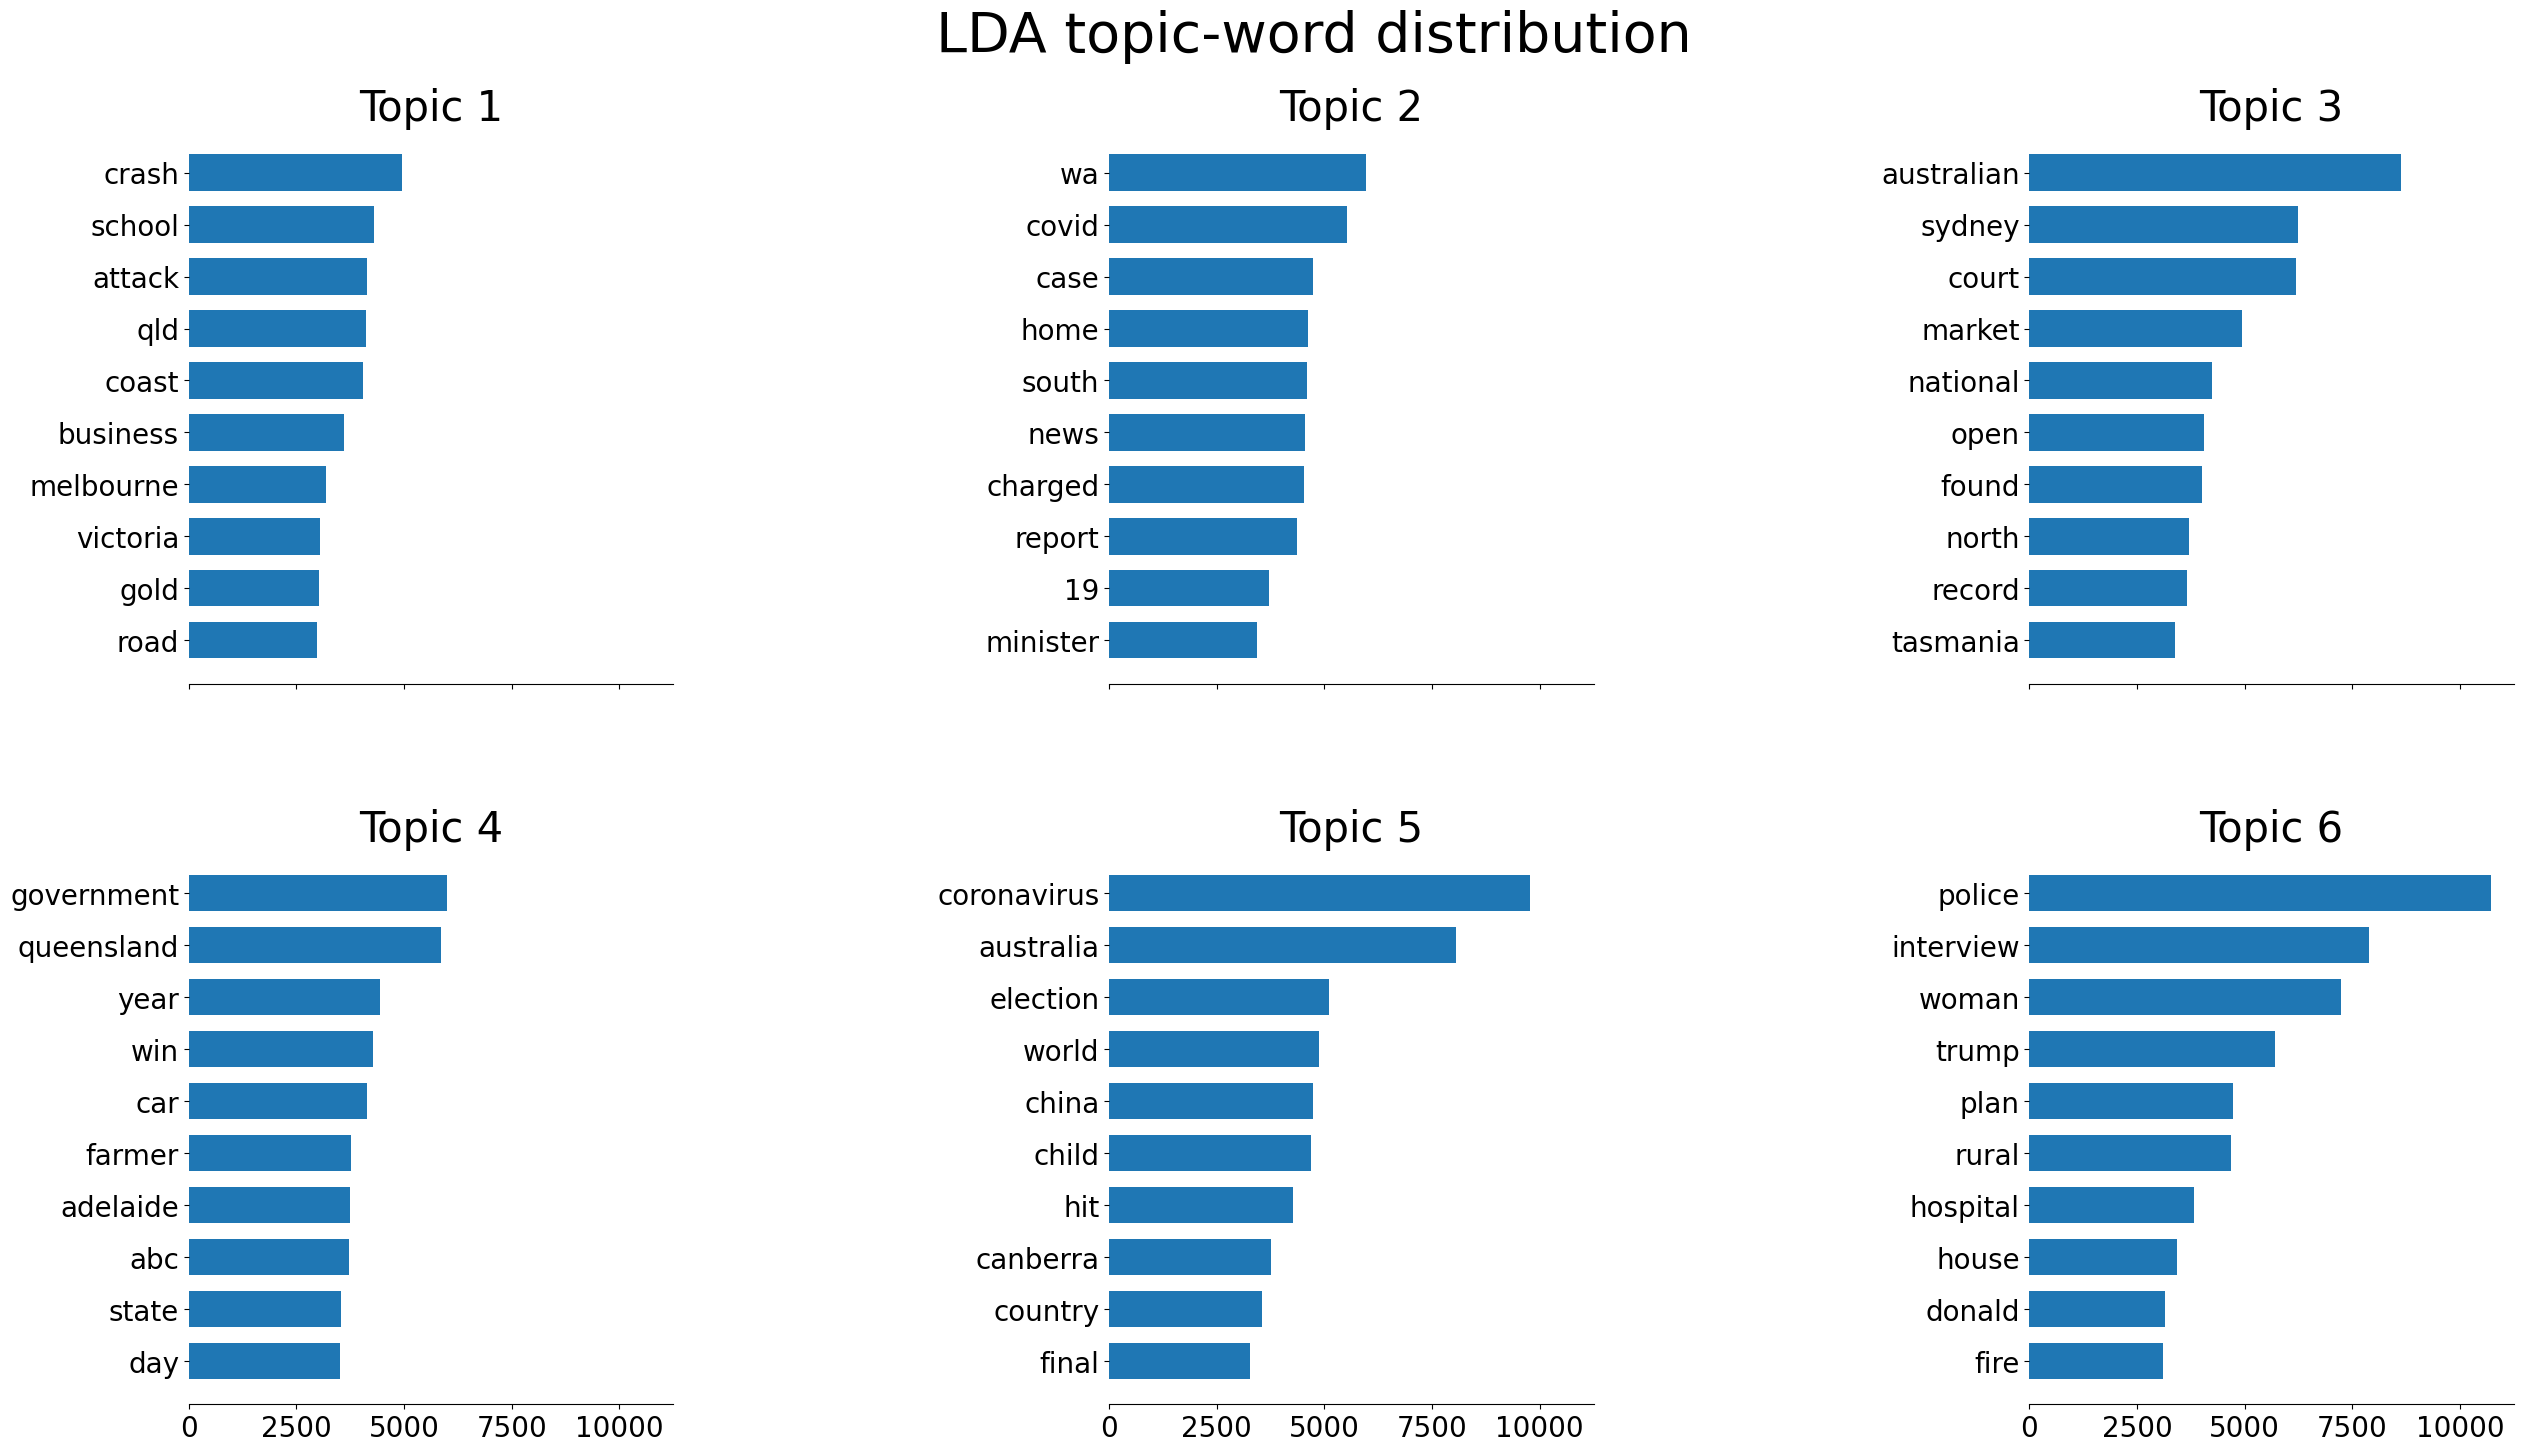

In [ ]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

tfidf_feature_names = tfidf.get_feature_names_out()
plot_top_words(lda_model, tfidf_feature_names, 10, 'LDA topic-word distribution')

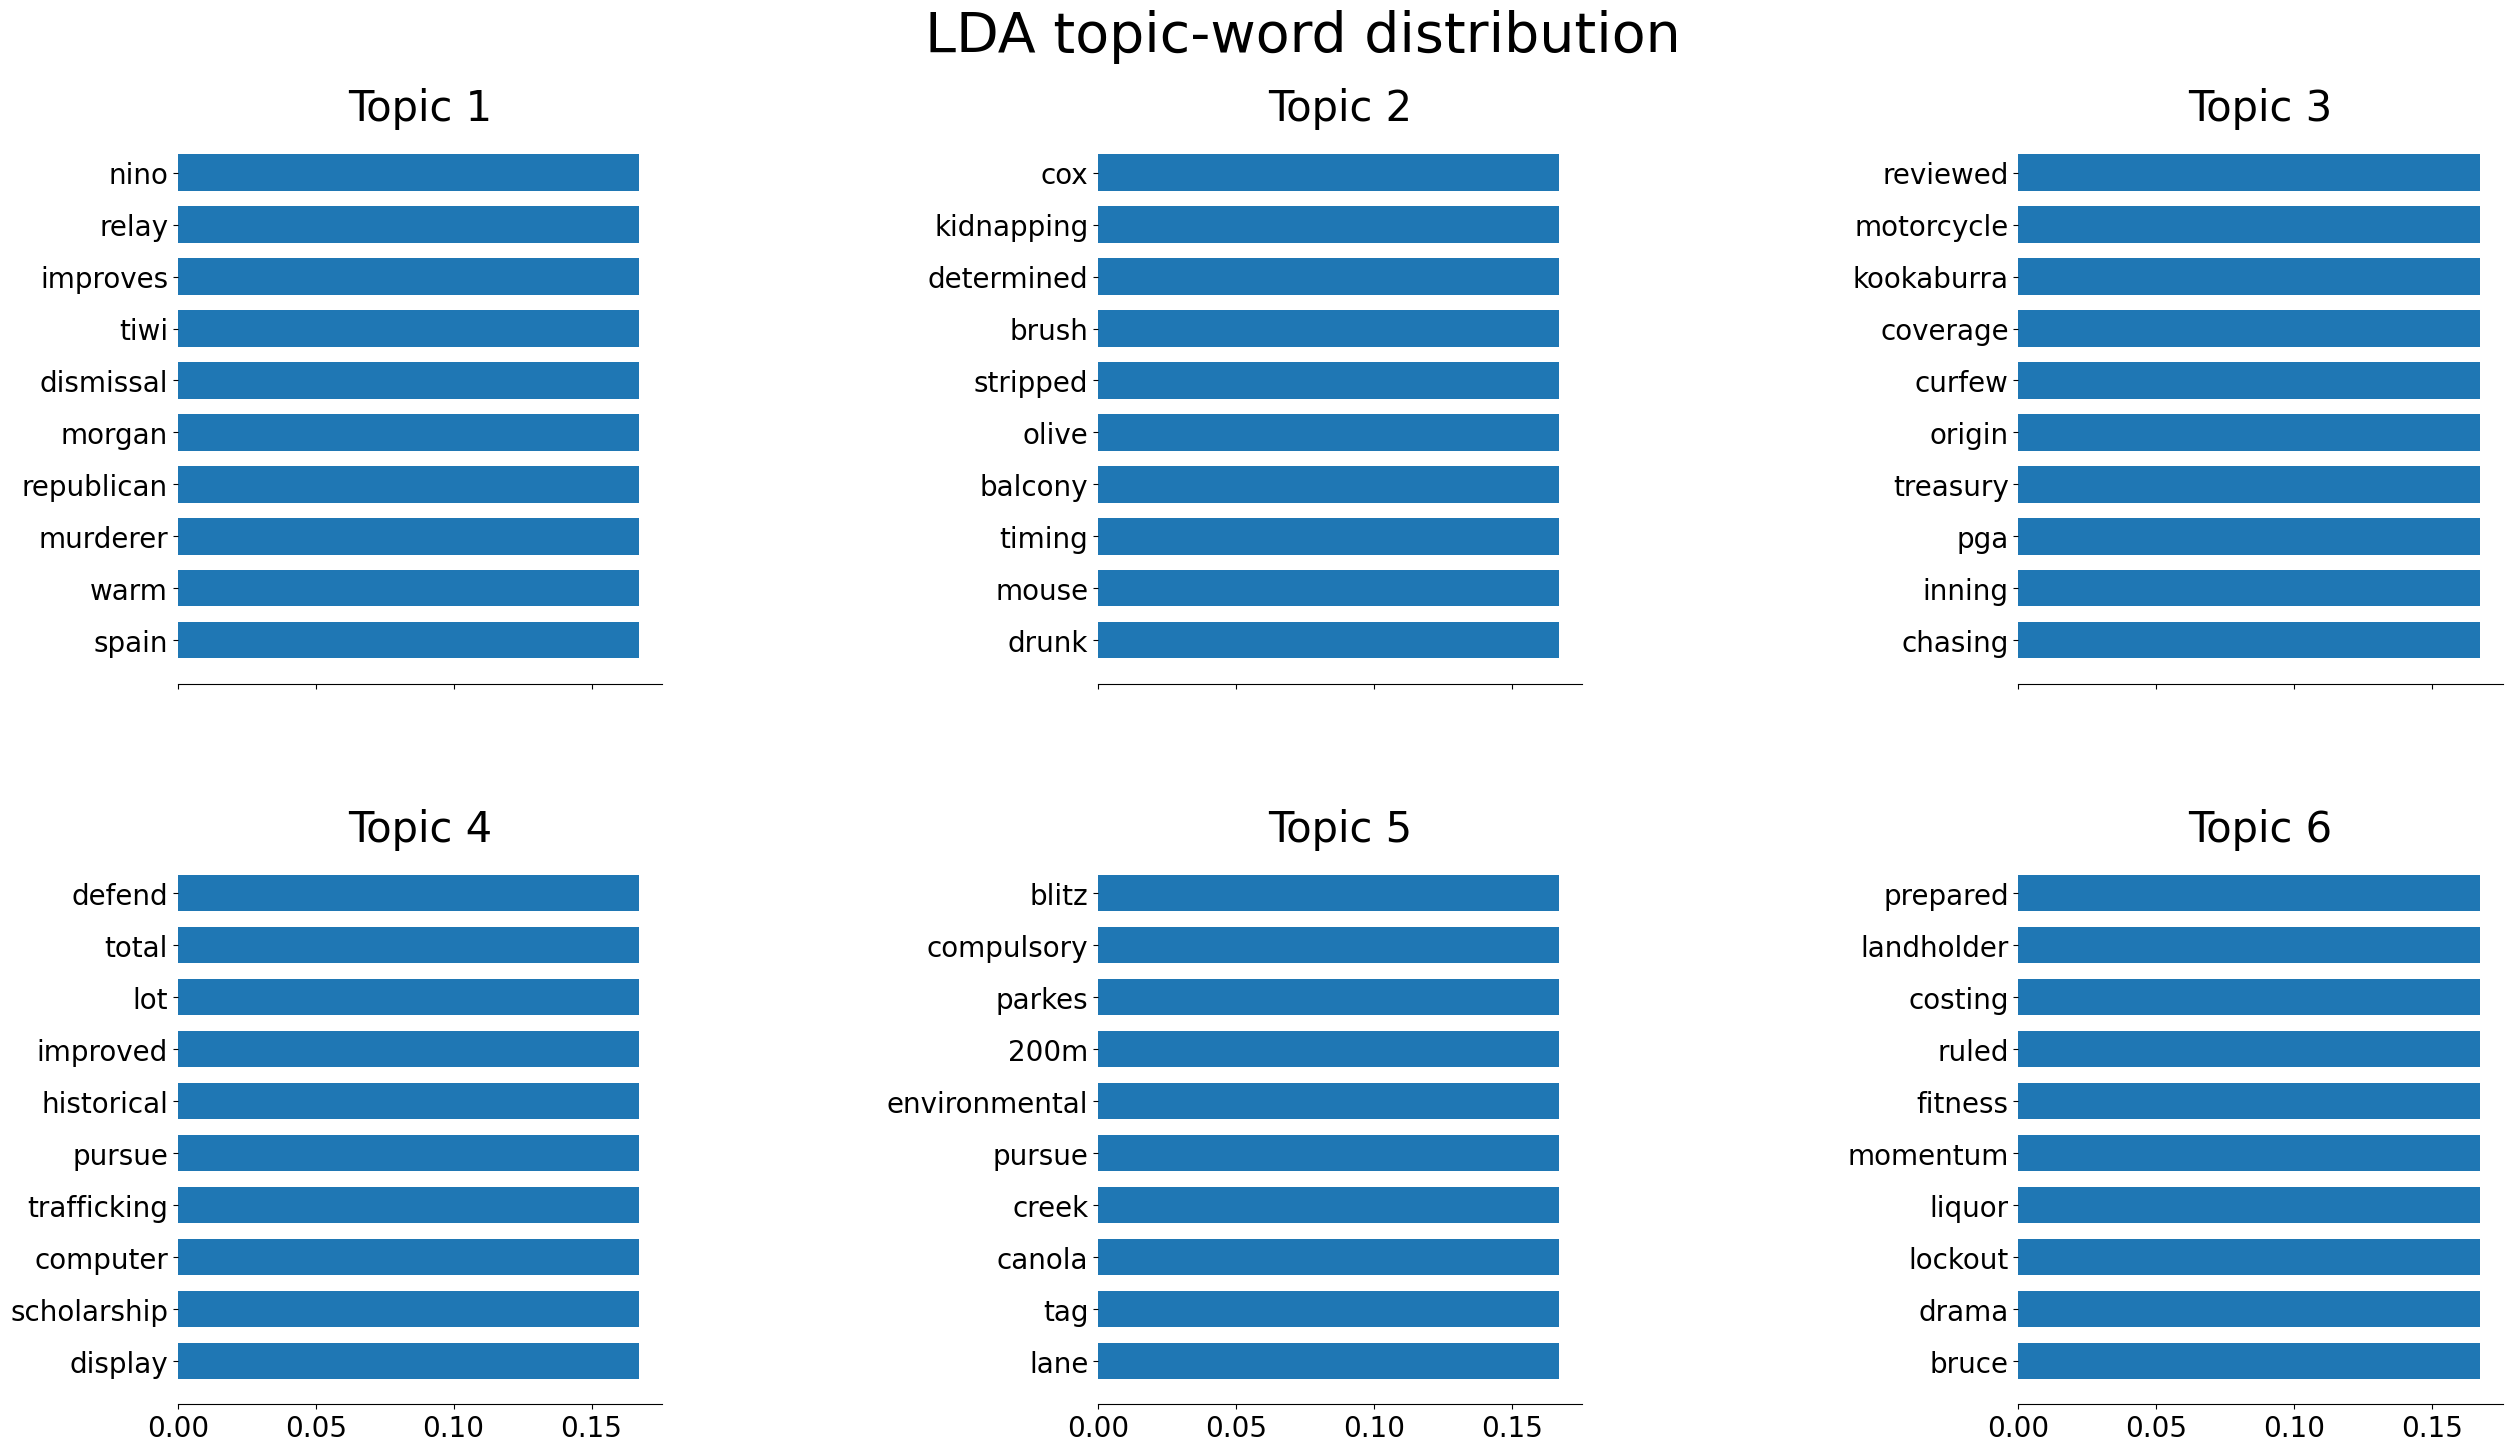

In [ ]:
def plot_bot_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[1000:1000+n_top_words]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

tfidf_feature_names = tfidf.get_feature_names_out()
plot_bot_words(lda_model, tfidf_feature_names, 10, 'LDA topic-word distribution')

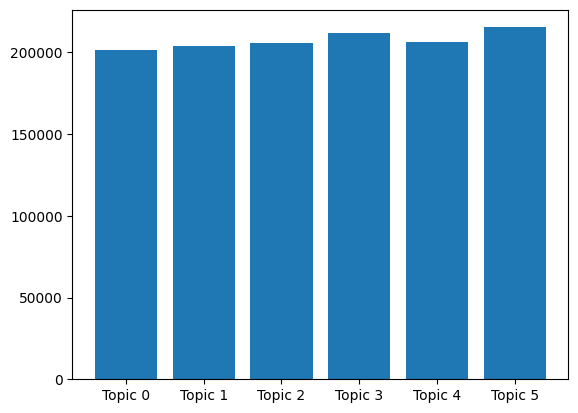

In [19]:
topiccounts = [0 for a in range(6)]
topics = [b for b in range(6)]

for i in range(len(lda_top)):
  for j, prob in enumerate(lda_top[i]):
    topiccounts[j] += prob

plt.bar(topics, topiccounts, tick_label = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])
plt.show()